In [2]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 78.2 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 21.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=98b44a4eccfd7c6cc2b9221d2869869cd8d23e947eb06e35e6cc180fabc226d4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
ticker_symbol = "TSLA" 

In [6]:
tesla = yf.Ticker(ticker_symbol) 

In [7]:
tesla_data = tesla.history(period="max")

In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [32]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [33]:
soup = BeautifulSoup(html_data, 'html5lib')

In [34]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [35]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [43]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [44]:
tesla_revenue.head()

,Date,Revenue


In [45]:
GameStop = yf.Ticker("GME")

In [46]:
gme_data = GameStop.history(period="max")

In [47]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [52]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text

In [53]:
soup = BeautifulSoup(html_data,"html5lib")

In [54]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [55]:
gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


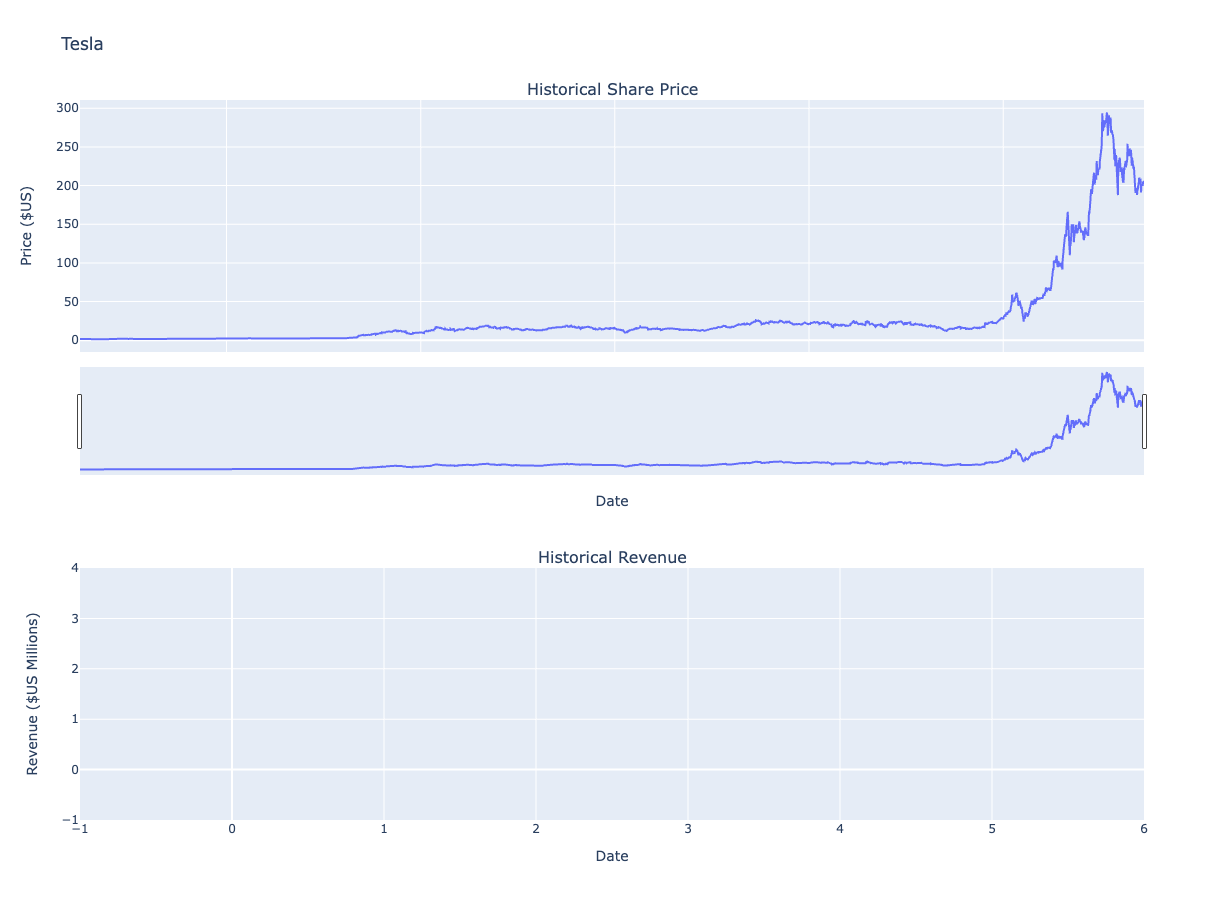

In [56]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

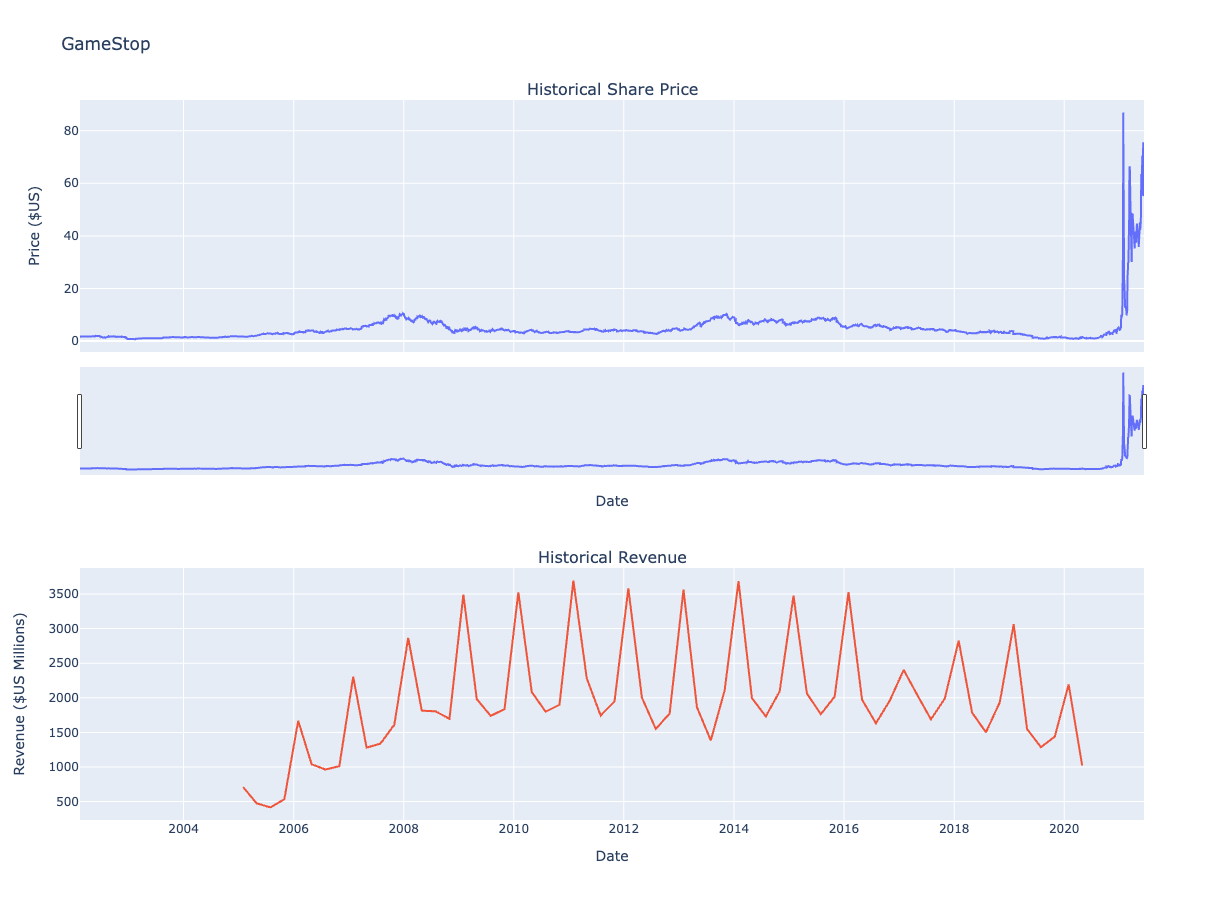

In [57]:
make_graph(gme_data, gme_revenue, 'GameStop')